In [1]:
import matplotlib.pyplot as plt
import numpy as np
from random import seed, random
from sklearn.model_selection import train_test_split
from tensorflow import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Activation, Dense
from sklearn.metrics import confusion_matrix

# Atelier 2
## Exercice 1
### 1- le rôle du Gradient Descent dans un réseau de neurone ?
L'algorithme de descente du gradient va permettre de minimiser la fonction de coût. 

### 2- Comment peut-on utiliser un Gradient Descent dans un réseau de neurone ?
Si la fonction que l’on minimise est Lipchitz et strictement convexe alors on montre que la descente de gradient converge vers l’unique minimum. On étudie la convergence de cet algorithme lorsque la fonction convexe est quadratique.

## Exercice 2
### 1- Quels sont les différents types de cost functions qu’on peut utiliser dans un algorithme d’apprentissage pour faire la classification ?
* Mean Squared Error Loss
* Mean Absolute Error Loss
* Binary Crossentropy Error
### 2- Comment peut on choisir une cost function ?
le role de cost fonction c'est mesurer les erreurs,alors pour choisir cost fonction en se basant sur le modèle qu'on va travailler avec et aussi la performance de chaque cost fonction. 
On choisit la Fonction Coût pour calculer la performance du modèle sur les exemples du Dataset à
travers l'algorithme de Gradient Descent. Ce dernier utilise la fonction d'erreur pour savoir
l'orientation vers la solution optimale.
### 3- Soit le programme #program2 donné en annexe

In [19]:

# la fonction sigmoid
def sigmoid(x):
    return 1/(1+np.exp(-x))
def f(x):
    return -x+5
# pour générer data
def generateData(n):
    
    # generate random numbers between 0-1
    seed(1)
    min=0
    max=5
    dataset=[]
    for _ in range(n):
        valueX1 = random()
        scaledvalueX1 = min + (valueX1 * (max - min))
        valueX2 = random()
        scaledvalueX2 = min + (valueX2 * (max - min))
        x1=round(scaledvalueX1,1)
        x2=round(scaledvalueX2,1)
        y0=f(x1)
        cl=0
        if(x2>y0):
            cl=1
        dataset.append([x1,x2,cl])
    return dataset
# program 2
lr=0.001
n_iters=1000
def fit(X,y):
    bias=0
    W=np.array([0.,0.])
    n_samples,n_features=X.shape
    for i in range(n_iters):
        linear_model=np.dot(X,W)+bias
        y_predicted=sigmoid(linear_model)
        dW=(1/n_samples)*np.dot(X.T,(y_predicted-y))
        dbias=(1/n_samples)*np.sum(y_predicted-y)
        W-=lr*dW #ligne12
        bias-=lr*dbias #ligne13
    return bias,W

#### 3-1- Quelle est la cost function à minimiser
La fonction de cout utilisée dans l'algorithme est Cross entropy
#### 3-2- Quelles sont les modifications à apporter au code source pour minimiser Mean Absolute Error

In [20]:

def fitMAE(X,y):
    bias=0
    W=np.array([0.,0.])
    n_samples,n_features=X.shape
    for i in range(n_iters):
        linear_model=np.dot(X,W)+bias
        y_predicted=sigmoid(linear_model)
        # mean absolute error
        mae=(1/n_samples)*np.sum(np.abs(y-y_predicted))
        # dw
        dW=(-1/n_samples)*np.dot(X.T,y_predicted*(1-y_predicted))
        # dbias
        dbias=(-1/n_samples)*np.sum(y_predicted*(1-y_predicted))
        W-=lr*dW #ligne12 
        bias-=lr*dbias #ligne13 
    return bias,W

### 3-3- Quelles sont les modifications à apporter au code source pour minimiser binary_crossentropy !!
Cet algorithme n'a besoin pas des modifications

In [21]:
lr=0.001
n_iters=1000
def fitMSE(X,y):
    bias=0
    W=np.array([0.,0.])
    n_samples,n_features=X.shape
    for i in range(n_iters):
        linear_model=np.dot(X,W)+bias
        y_predicted=sigmoid(linear_model)
        # Mean Squared Error
        mae=(1/n_samples)*np.sum((y-y_predicted)**2)
        # dw
        dW=(-2/n_samples)*np.dot(X.T,y_predicted*(1-y_predicted)*(y-y_predicted))
        # dbias
        dbias=(-2/n_samples)*np.sum(y_predicted*(1-y_predicted)*(y-y_predicted))
        W-=lr*dW #ligne12 
        bias-=lr*dbias #ligne13 
    return bias,W


## Exercice 3
### 1- À l’aide du programme #program1 de l’annexe de l’atelier précédent, générer 100 enregistrements.

In [22]:
dataset=generateData(100)
dataset=np.array(dataset)
X=dataset[:,:2]
y=dataset[:,2]
y=y.astype(int)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=25)

### 2- Tracer les données dans un graphe

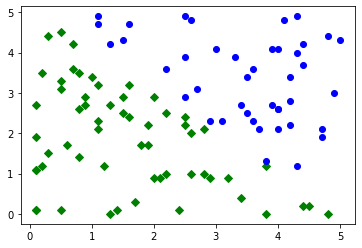

In [23]:
def plotData(dataset):
    c0=dataset[:,2]==0
    c1=dataset[:,2]==1
    XD1=dataset[:,0][c0]
    YD1=dataset[:,1][c0]
    XD2=dataset[:,0][c1]
    YD2=dataset[:,1][c1]
    plt.plot(XD1,YD1, 'gD')
    plt.plot(XD2,YD2, 'bo')

plotData(dataset)

### Soit le programme #program2 en annexe,
### 1. Modifier le code source de manière à afficher les éléments suivants à chaque 10000 itérations
* a. Accuracy
* b. Loss value (binary_crossentropy)
* c. W, bias
* d. L’état du modèle (ligne séparatrice) sous format de graphe comme montré dans l’aperçu ci-dessous
* e. Mettre en évidence les enregistrements mal classés (surlignés en rouge)

In [24]:
# accuracy
def calcul_accuracy(y,y_pred):
    same=0
    all=len(y)
    for i,j in zip(y,y_pred):
        if i==j:
            same=same+1
    return same/all


In [25]:
# calculer la prediction :
def predict(bias,W,X):
    linear_model=np.dot(X,W)+bias
    y_predicted=sigmoid(linear_model)
    y_predicted_cls=[1 if i>0.5 else 0 for i in y_predicted]
    return y_predicted_cls

In [29]:
# le cas d'une seule itération
lr=0.001
n_iters=1
def fit(X,y):
    bias=0
    W=np.array([0.,0.])
    accuracy=[]
    n_samples,n_features=X.shape
    for i in range(n_iters):
        linear_model=np.dot(X,W)+bias
        y_predicted=sigmoid(linear_model)
        # accuracy
        accuracy=calcul_accuracy(y,predict(bias,W,X))
        # Loss value (binary_crossentropy)
        log_loss=(-1/n_samples)*np.sum(y*np.log(y_predicted)+(1-y)*np.log(1-y_predicted))
        dW=(1/n_samples)*np.dot(X.T,(y_predicted-y))
        dbias=(1/n_samples)*np.sum(y_predicted-y)
        # W, bias
        W-=lr*dW #ligne12
        bias-=lr*dbias #ligne13

    return bias,W,log_loss,accuracy


In [30]:
bias,W,log_loss,accuracy=fit(X,y)
#log_loss,accuracy

Iteration :1, ( -8e-05 , [0.000265  0.0001785] )


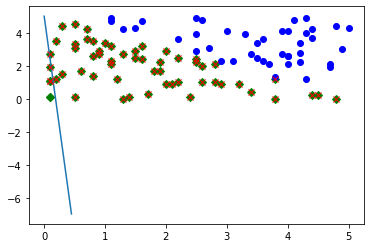

In [33]:
def g(bias,w1,w2,x):
    return (-bias/w2)-(w1/w2)*x

def plotData(dataset,W,bias):
    c0=dataset[:,2]==0
    c1=dataset[:,2]==1
    XD1=dataset[:,0][c0]
    YD1=dataset[:,1][c0]
    XD2=dataset[:,0][c1]
    YD2=dataset[:,1][c1]
    plt.plot(XD1,YD1, 'gD')
    plt.plot(XD2,YD2, 'bo')
    #L’état du modèle (ligne séparatrice) sous format de graphe 
    w1=W[0]
    w2=W[1]
    plt.plot([0,g(bias,w1,w2,0)],[5,g(bias,w1,w2,5)])
    for i,j in zip(XD1,YD1):
        if g(bias,w1,w2,i) <= j:
            plt.plot(i,j,"rx")
plotData(dataset,W,bias)
print("Iteration :{}, (".format(n_iters),bias,",",W,")")

Iteration :10000, ( -1.2261241901700848 , [0.35899885 0.19449662] )


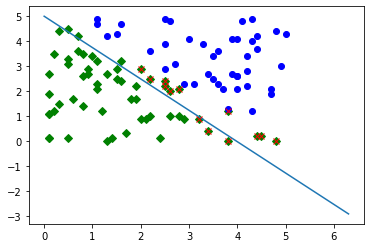

In [34]:
# 10000 itérations
lr=0.001
n_iters=10000
bias,W,log_loss,accuracy=fit(X,y)
plotData(dataset,W,bias)
n_iters,bias,W,log_loss,accuracy
print("Iteration :{}, (".format(n_iters),bias,",",W,")")

Iteration :70000, ( -4.783090282378295 , [0.98832585 0.87716677] )


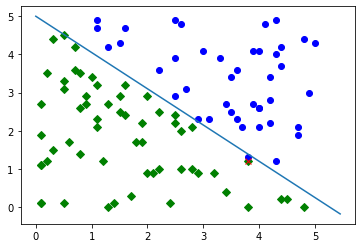

In [35]:
# 70000 itérations
lr=0.001
n_iters=70000
bias,W,log_loss,accuracy=fit(X,y)
plotData(dataset,W,bias)
n_iters,bias,W,log_loss,accuracy
print("Iteration :{}, (".format(n_iters),bias,",",W,")")

Iteration :90000, (-5.474611307075759, [1.11583232 1.01026215])


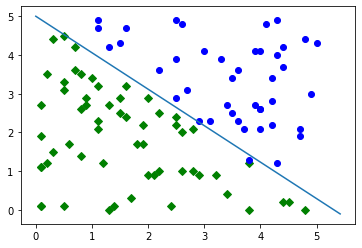

In [36]:
# 90000 itérations
lr=0.001
n_iters=90000
bias,W,log_loss,accuracy=fit(X,y)
plotData(dataset,W,bias)
n_iters,bias,W,log_loss,accuracy
print("Iteration :{}, ({}, {})".format(n_iters,bias,W))

### 2. Comparer le résultat trouvé avec celui trouvé en 2.7) de l’exercice 4 de l’atelier précédent
On remarque que nous avons obtenu le meme résultat.